<a href="https://colab.research.google.com/github/TyroneNorth/Colaboratory-Star-Type-Classification/blob/master/Stars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stars Classification

In [1]:
pip install -U pycaret

Requirement already up-to-date: pycaret in /usr/local/lib/python3.6/dist-packages (1.0.0)


In [0]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score
from sklearn.tree import export_graphviz
from IPython.display import Image
from pycaret.classification import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import *

#Exploratory Data Analysis

In [3]:
stars = pd.read_csv('/content/drive/My Drive/Documents/Datasets/Stars/6 class csv.csv')
stars.head(n = 43)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.17000,16.120,Brown Dwarf,Red,M
1,3042,0.000500,0.15420,16.600,Brown Dwarf,Red,M
2,2600,0.000300,0.10200,18.700,Brown Dwarf,Red,M
3,2800,0.000200,0.16000,16.650,Brown Dwarf,Red,M
4,1939,0.000138,0.10300,20.060,Brown Dwarf,Red,M
5,2840,0.000650,0.11000,16.980,Brown Dwarf,Red,M
6,2637,0.000730,0.12700,17.220,Brown Dwarf,Red,M
7,2600,0.000400,0.09600,17.400,Brown Dwarf,Red,M
8,2650,0.000690,0.11000,17.450,Brown Dwarf,Red,M
9,2700,0.000180,0.13000,16.050,Brown Dwarf,Red,M


In [4]:
stars.columns

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')

In [5]:
stars['Star type'].value_counts()

Hyper  Giant     40
Red Dwarf        40
Brown Dwarf      40
Main Sequence    40
White Dwarf      40
Super Giant      40
Name: Star type, dtype: int64

In [6]:
stars['Star color'].value_counts()

Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              3
Yellowish White         3
white                   3
yellowish               2
Orange                  2
Whitish                 2
Blue white              1
Blue-White              1
Orange-Red              1
Blue                    1
Yellowish               1
White-Yellow            1
Pale yellow orange      1
Name: Star color, dtype: int64

##Visualizing the data

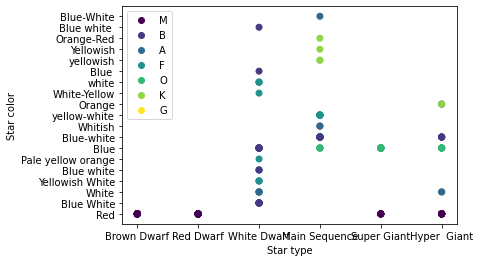

In [7]:
star_dict = {
    'Brown Dwarf' : 0,
    'Red Dwarf' : 1,
    'White Dwarf' : 2,
    'Main Sequence' : 3,
    'Supergiant' : 4,
    'Hypergiant' : 5
}

spectral_dict = {
    'M' : 0,
    'B' : 1,
    'A' : 2,
    'F' : 3,
    'O' : 4,
    'K' : 5,
    'G' : 6
}

colors = [spectral_dict[item]
          for item in stars['Spectral Class']]

spectral_scatter = plt.scatter(stars['Star type'], stars['Star color'], c = colors)
plt.xlabel('Star type')
plt.ylabel('Star color')

plt.legend(handles = spectral_scatter.legend_elements()[0],
           labels = spectral_dict.keys())
plt.show()

In [8]:
stars.columns

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')

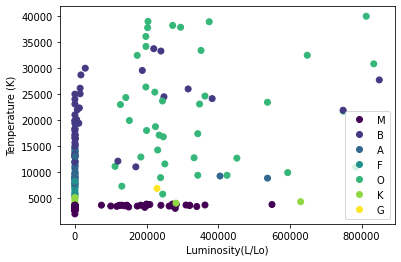

<Figure size 432x288 with 0 Axes>

In [9]:
spectral_scatter = plt.scatter(stars['Luminosity(L/Lo)'], stars['Temperature (K)'], c = colors)
plt.xlabel('Luminosity(L/Lo)')
plt.ylabel('Temperature (K)')

plt.legend(handles = spectral_scatter.legend_elements()[0],
           labels = spectral_dict.keys())
plt.show()
plt.savefig('lum-temp.png')

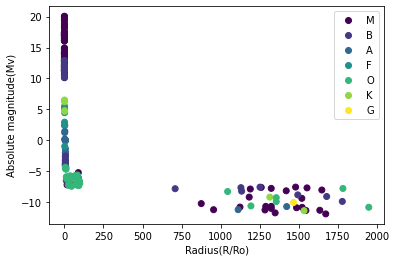

<Figure size 432x288 with 0 Axes>

In [10]:
spectral_scatter = plt.scatter(stars['Radius(R/Ro)'], stars['Absolute magnitude(Mv)'], c = colors)
plt.xlabel('Radius(R/Ro)')
plt.ylabel('Absolute magnitude(Mv)')

plt.legend(handles = spectral_scatter.legend_elements()[0],
           labels = spectral_dict.keys())
plt.show()
plt.savefig('rad-amag.png')

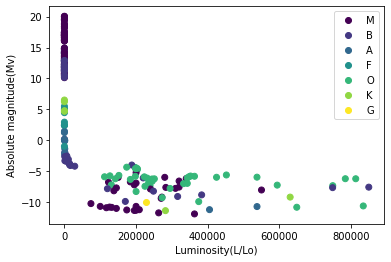

<Figure size 432x288 with 0 Axes>

In [11]:
spectral_scatter = plt.scatter(stars['Luminosity(L/Lo)'], stars['Absolute magnitude(Mv)'], c = colors)
plt.xlabel('Luminosity(L/Lo)')
plt.ylabel('Absolute magnitude(Mv)')

plt.legend(handles = spectral_scatter.legend_elements()[0],
           labels = spectral_dict.keys())
plt.show()
plt.savefig('lum-amag.png')

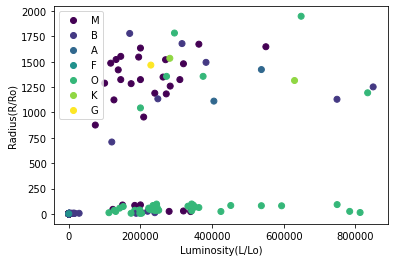

<Figure size 432x288 with 0 Axes>

In [12]:
spectral_scatter = plt.scatter(stars['Luminosity(L/Lo)'], stars['Radius(R/Ro)'], c = colors)
plt.xlabel('Luminosity(L/Lo)')
plt.ylabel('Radius(R/Ro)')

plt.legend(handles = spectral_scatter.legend_elements()[0],
           labels = spectral_dict.keys())
plt.show()
plt.savefig('test.png')

#Spliting the data into train and test sets

In [13]:
X = stars[['Temperature (K)', 'Luminosity(L/Lo)', 'Absolute magnitude(Mv)']]

y = stars['Star type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1, stratify = y)

y_train.value_counts()
y_test.value_counts()

Main Sequence    12
Brown Dwarf      12
White Dwarf      12
Red Dwarf        12
Super Giant      12
Hyper  Giant     12
Name: Star type, dtype: int64

#Train KNeighbors classification model

In [14]:
stars_knn = KNeighborsClassifier(n_neighbors=5)
stars_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [15]:
stars_knn.predict(X_test)


array(['Brown Dwarf', 'White Dwarf', 'Brown Dwarf', 'White Dwarf',
       'White Dwarf', 'Super Giant', 'Red Dwarf', 'Main Sequence',
       'White Dwarf', 'Brown Dwarf', 'Hyper  Giant', 'Brown Dwarf',
       'Main Sequence', 'Brown Dwarf', 'White Dwarf', 'Red Dwarf',
       'Super Giant', 'Hyper  Giant', 'Red Dwarf', 'Super Giant',
       'Hyper  Giant', 'Hyper  Giant', 'White Dwarf', 'Hyper  Giant',
       'Brown Dwarf', 'Super Giant', 'Main Sequence', 'Main Sequence',
       'Hyper  Giant', 'White Dwarf', 'Brown Dwarf', 'Main Sequence',
       'White Dwarf', 'Brown Dwarf', 'Red Dwarf', 'White Dwarf',
       'Red Dwarf', 'Brown Dwarf', 'Main Sequence', 'Hyper  Giant',
       'Hyper  Giant', 'Super Giant', 'White Dwarf', 'White Dwarf',
       'Red Dwarf', 'Hyper  Giant', 'White Dwarf', 'Hyper  Giant',
       'Brown Dwarf', 'White Dwarf', 'Red Dwarf', 'Hyper  Giant',
       'Brown Dwarf', 'White Dwarf', 'Red Dwarf', 'Super Giant',
       'Hyper  Giant', 'Red Dwarf', 'Brown Dwarf', 'Whi

In [16]:
y_pred = stars_knn.predict(X_test)
y_pred[:5]

array(['Brown Dwarf', 'White Dwarf', 'Brown Dwarf', 'White Dwarf',
       'White Dwarf'], dtype=object)

In [17]:
prob_pred = stars_knn.predict_proba(X_test)
prob_pred[:5]

array([[0.8, 0. , 0. , 0.2, 0. , 0. ],
       [0. , 0. , 0.2, 0. , 0. , 0.8],
       [0.8, 0. , 0. , 0.2, 0. , 0. ],
       [0. , 0. , 0.4, 0. , 0. , 0.6],
       [0. , 0. , 0. , 0. , 0. , 1. ]])

#Model Evaluation

In [18]:
stars_knn.score(X_test, y_test)

0.6388888888888888

In [19]:
confusion_matrix(y_test, y_pred,
                 labels = ['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence', 'Supergiant', 'Hypergiant' ])

array([[ 8,  4,  0,  0,  0,  0],
       [ 7,  5,  0,  0,  0,  0],
       [ 0,  0, 12,  0,  0,  0],
       [ 0,  0,  4,  8,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0]])

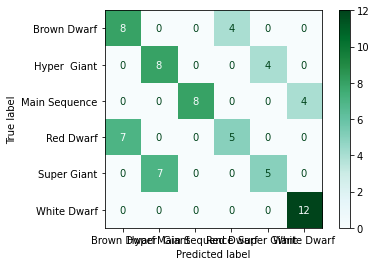

In [20]:
plot_confusion_matrix(stars_knn, X_test, y_test, 
                 cmap=plt.cm.BuGn)
plt.savefig('confusion_matrix_kneigh.png')

##K-fold Cross Validation

In [21]:
stars_knn_cv = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

cv_scores = cross_val_score(stars_knn_cv, X, y, cv = 5)

print(cv_scores)

[0.625      0.64583333 0.66666667 0.70833333 0.66666667]


In [22]:
print(cv_scores.mean())

0.6625


##Grid search - tuning the hyperparameter

In [23]:
stars_knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors' : np.arange(2, 10)}
stars_knn_gscv = GridSearchCV(stars_knn2, param_grid, cv = 10)
stars_knn_gscv.fit(X, y)
stars_knn_gscv.best_params_


{'n_neighbors': 4}

In [24]:
stars_knn_gscv.best_score_

0.6875

###Build final Model

In [25]:
stars_knn_final = KNeighborsClassifier(n_neighbors = stars_knn_gscv.best_params_['n_neighbors'])
stars_knn_final.fit(X, y)
y_pred_final = stars_knn_final.predict(X)
stars_knn_final.score(X, y)

0.8125

###Final accuracy of 81.25% VERSUS intital model of 63.8% 

In [26]:
final_score = stars_knn_final.score(X, y)
init_score = stars_knn.score(X_test, y_test)
improv = final_score - init_score
print(improv)

0.17361111111111116


In [27]:
print(init_score)

0.6388888888888888


In [28]:
print(final_score)

0.8125


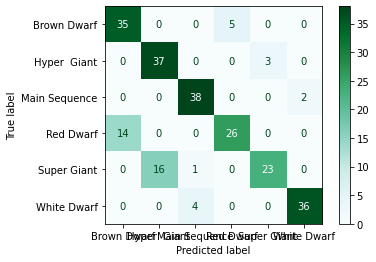

In [29]:
plot_confusion_matrix(stars_knn_final, X, y, 
                 cmap=plt.cm.BuGn)
plt.savefig('knearest_confusion_matrix.png')

#Decission Tree Classifier

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state = 22
)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

print(model.score)

<bound method ClassifierMixin.score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')>


In [31]:
print(model.predict(X_test))

['White Dwarf' 'Super Giant' 'Brown Dwarf' 'Red Dwarf' 'Red Dwarf'
 'Brown Dwarf' 'Main Sequence' 'Main Sequence' 'Super Giant' 'White Dwarf'
 'Brown Dwarf' 'White Dwarf' 'Main Sequence' 'Red Dwarf' 'Hyper  Giant'
 'Red Dwarf' 'Super Giant' 'Red Dwarf' 'Red Dwarf' 'White Dwarf'
 'Super Giant' 'Brown Dwarf' 'Super Giant' 'Brown Dwarf' 'Red Dwarf'
 'Main Sequence' 'Hyper  Giant' 'White Dwarf' 'Main Sequence'
 'Brown Dwarf' 'White Dwarf' 'Main Sequence' 'Hyper  Giant' 'Hyper  Giant'
 'Brown Dwarf' 'Main Sequence' 'Hyper  Giant' 'Main Sequence'
 'Hyper  Giant' 'Brown Dwarf' 'Hyper  Giant' 'White Dwarf' 'Brown Dwarf'
 'White Dwarf' 'Brown Dwarf' 'Main Sequence' 'Super Giant' 'White Dwarf'
 'Red Dwarf' 'Super Giant' 'Hyper  Giant' 'Brown Dwarf' 'Brown Dwarf'
 'Main Sequence' 'Super Giant' 'Hyper  Giant' 'Main Sequence'
 'White Dwarf' 'Red Dwarf' 'Hyper  Giant']


In [32]:
y_pred = model.predict(X_test)
print(y_pred)

['White Dwarf' 'Super Giant' 'Brown Dwarf' 'Red Dwarf' 'Red Dwarf'
 'Brown Dwarf' 'Main Sequence' 'Main Sequence' 'Super Giant' 'White Dwarf'
 'Brown Dwarf' 'White Dwarf' 'Main Sequence' 'Red Dwarf' 'Hyper  Giant'
 'Red Dwarf' 'Super Giant' 'Red Dwarf' 'Red Dwarf' 'White Dwarf'
 'Super Giant' 'Brown Dwarf' 'Super Giant' 'Brown Dwarf' 'Red Dwarf'
 'Main Sequence' 'Hyper  Giant' 'White Dwarf' 'Main Sequence'
 'Brown Dwarf' 'White Dwarf' 'Main Sequence' 'Hyper  Giant' 'Hyper  Giant'
 'Brown Dwarf' 'Main Sequence' 'Hyper  Giant' 'Main Sequence'
 'Hyper  Giant' 'Brown Dwarf' 'Hyper  Giant' 'White Dwarf' 'Brown Dwarf'
 'White Dwarf' 'Brown Dwarf' 'Main Sequence' 'Super Giant' 'White Dwarf'
 'Red Dwarf' 'Super Giant' 'Hyper  Giant' 'Brown Dwarf' 'Brown Dwarf'
 'Main Sequence' 'Super Giant' 'Hyper  Giant' 'Main Sequence'
 'White Dwarf' 'Red Dwarf' 'Hyper  Giant']


##Model Evaluation

In [33]:
tree_acc = model.score(X_test, y_test)
tree_pre = precision_score(y_test, y_pred, average = 'weighted')
tree_rec = recall_score(y_test, y_pred, average = 'weighted')
print('Accuracy : ', tree_acc)
print('Precision : ', tree_pre)
print('Recall : ', tree_rec)

Accuracy :  1.0
Precision :  1.0
Recall :  1.0


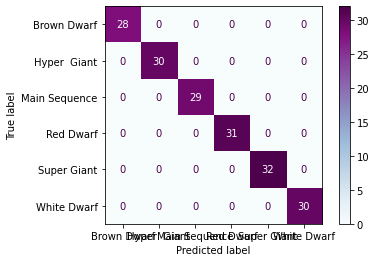

In [34]:
plot_confusion_matrix(model, X_train, y_train, 
                      cmap = plt.cm.BuPu)
plt.savefig('dt_confusion_matrix.png')

###Decission Tree Visualization

In [35]:
model.classes_

array(['Brown Dwarf', 'Hyper  Giant', 'Main Sequence', 'Red Dwarf',
       'Super Giant', 'White Dwarf'], dtype=object)

##Exporting Decision Tree tree.png

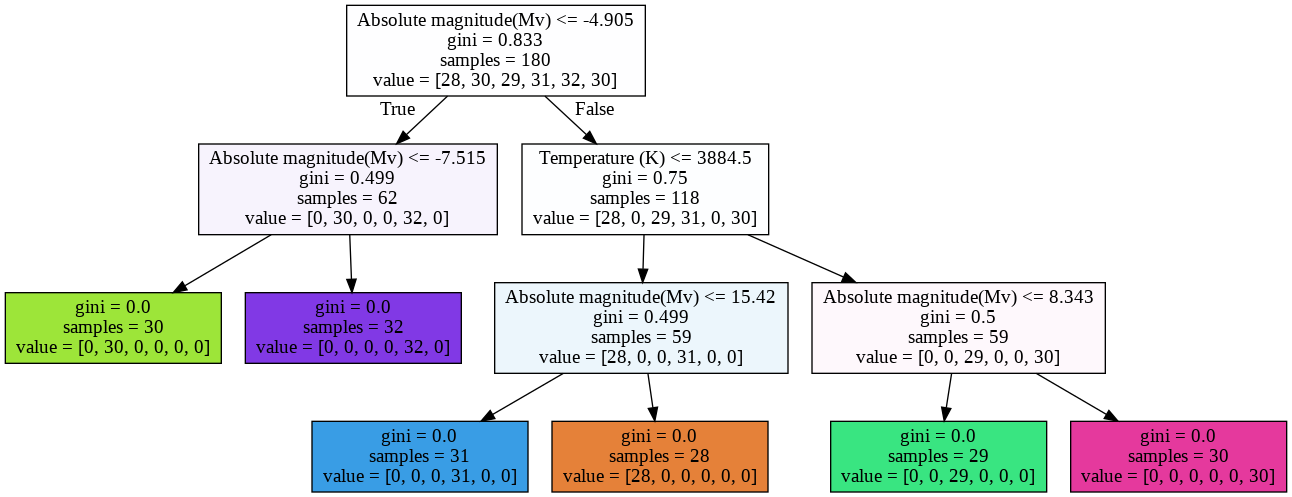

In [36]:
feature_names = ['Temperature (K)', 'Luminosity(L/Lo)', 'Absolute magnitude(Mv)']

dot_file = export_graphviz(model, feature_names = feature_names, filled = True)

import graphviz
graph = graphviz.Source(dot_file)

graph.render(filename = 'tree', format = 'png', cleanup = True)

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

#Random Forest

In [37]:
stars.columns

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')

##Random Forest Metrics

In [38]:
Xfor_train, Xfor_test, yfor_train, yfor_test = train_test_split(X, y, random_state = 101)

stars_rf = RandomForestClassifier()
stars_rf.fit(Xfor_train, yfor_train)
new_pred = stars_rf.predict(Xfor_test)
for_acc = model.score(Xfor_test, yfor_test)
for_pre = precision_score(yfor_test, new_pred, average = 'weighted')
for_rec = recall_score(yfor_test, new_pred, average = 'weighted')
print('Accuracy : ', for_acc )
print('Precision : ', for_pre)
print('Recall : ', for_rec)

Accuracy :  1.0
Precision :  1.0
Recall :  1.0


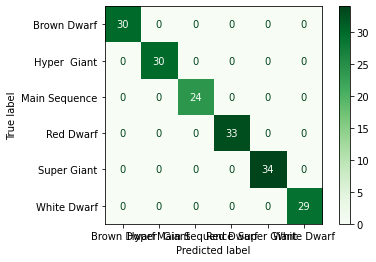

In [39]:
plot_confusion_matrix(stars_rf, Xfor_train, yfor_train, 
                      cmap = plt.cm.Greens, )
plt.savefig('forest_confusion_matrix.png')

##Exporting Random Forest to png


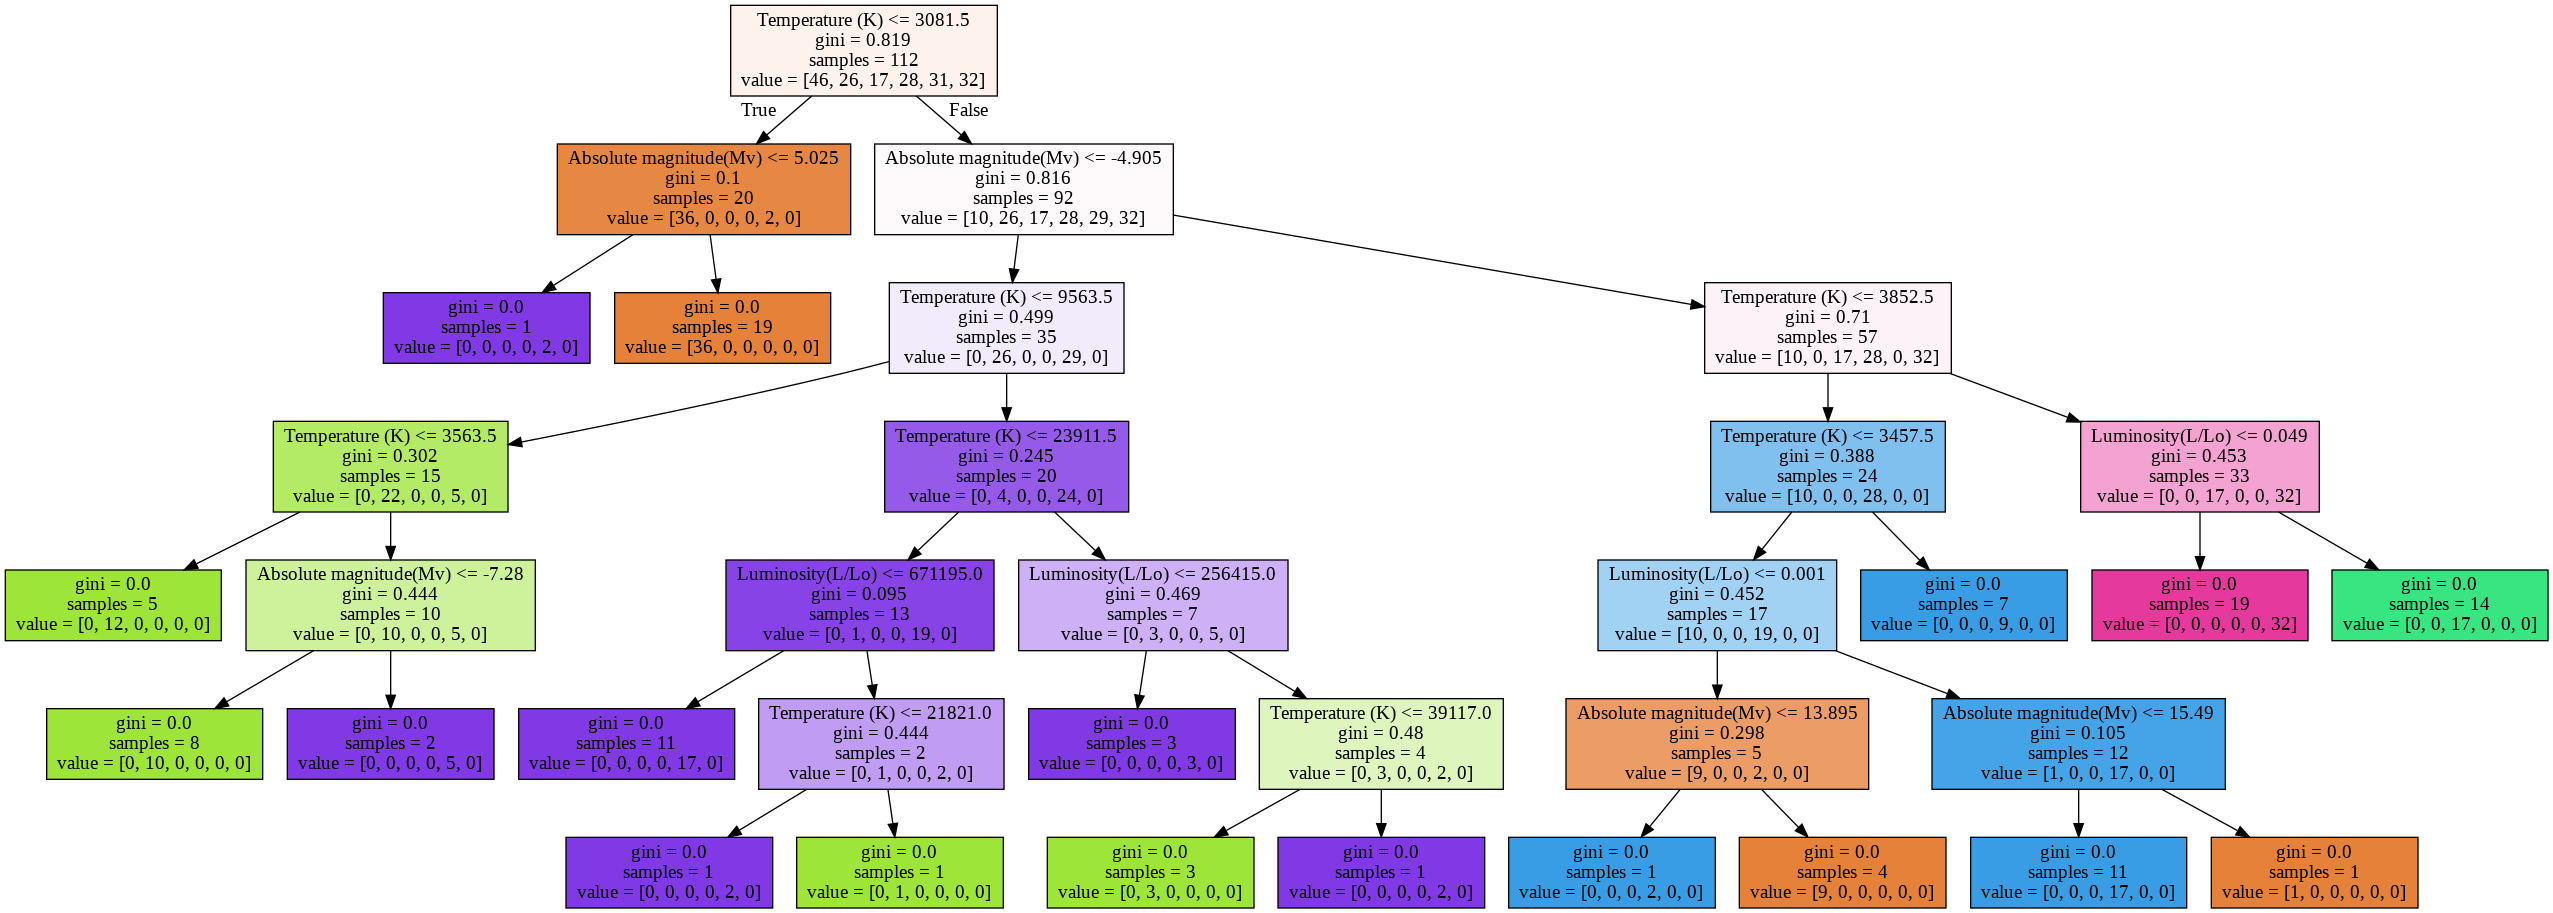

In [40]:
feature_names = ['Temperature (K)', 'Luminosity(L/Lo)', 'Absolute magnitude(Mv)']

dot_file = export_graphviz(stars_rf.estimators_[8], feature_names = feature_names, filled = True, )

import graphviz
graph = graphviz.Source(dot_file)

graph.render(filename = 'forest', format = 'png', cleanup = True)

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'forest.png')

#PyCaret

In [41]:
stars_cl = setup(data = stars, target = 'Star type', train_size=0.7)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,4194
1,Target Type,Multiclass
2,Label Encoded,"Brown Dwarf: 0, Hyper Giant: 1, Main Sequence: 2, Red Dwarf: 3, Super Giant: 4, White Dwarf: 5"
3,Original Data,"(240, 7)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [42]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Light Gradient Boosting Machine,0.994100,0.000000,0.994400,0.995600,0.993900,0.992900
1,CatBoost Classifier,0.994100,0.000000,0.994400,0.995600,0.993900,0.992900
2,Gradient Boosting Classifier,0.987900,0.000000,0.988900,0.990900,0.987500,0.985400
3,Ada Boost Classifier,0.981600,0.000000,0.983300,0.989300,0.980400,0.978000
4,Extreme Gradient Boosting,0.981600,0.000000,0.983300,0.989300,0.980400,0.978000
5,Random Forest Classifier,0.976100,0.000000,0.975000,0.982600,0.975200,0.971200
6,Logistic Regression,0.975700,0.000000,0.975000,0.982300,0.974800,0.970700
7,Extra Trees Classifier,0.970200,0.000000,0.969400,0.978200,0.969100,0.964100
8,Decision Tree Classifier,0.928300,0.000000,0.930600,0.934000,0.920800,0.913700
9,Naive Bayes,0.890800,0.000000,0.888900,0.898800,0.881400,0.868600


##Results Visualization

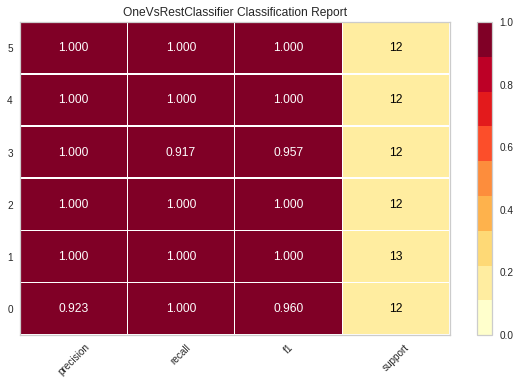

<Figure size 576x396 with 0 Axes>

In [50]:
stars_clmodel = create_model('rf')
plot_model(stars_clmodel, 'class_report')
plt.savefig('pycaret_matrix.png')

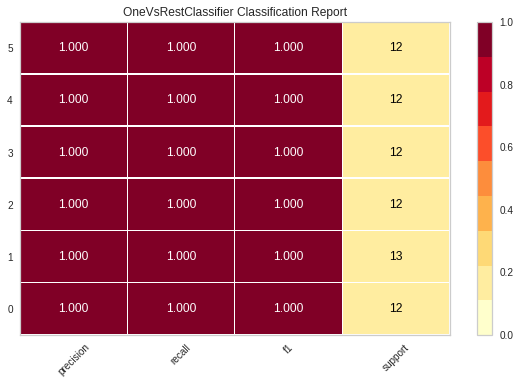

NameError: ignored

In [58]:
stars_clmodel2 = create_model('catboost')
plot_model(stars_clmodel2, 'class_report')


In [59]:
plt.savefig('catboost.png')

<Figure size 576x396 with 0 Axes>

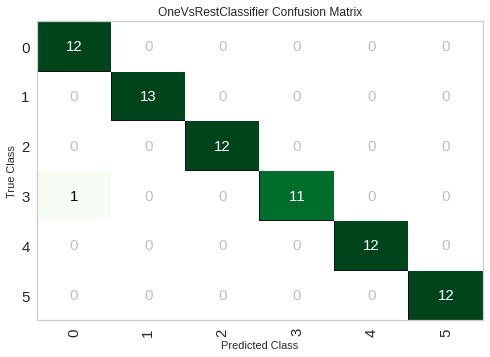

<Figure size 576x396 with 0 Axes>

In [57]:
plot_model(stars_clmodel, 'confusion_matrix')

In [53]:
pred_test = predict_model(stars_clmodel)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,One Vs Rest Classifier,0.9863,0,0.9861,0.9874,0.9863,0.9836


In [0]:
evaluate_model(stars_rf)

In [61]:
evaluate_model(stars_clmodel2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [63]:
evaluate_model(stars_clmodel)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

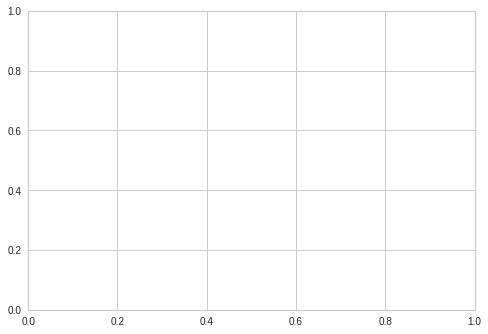

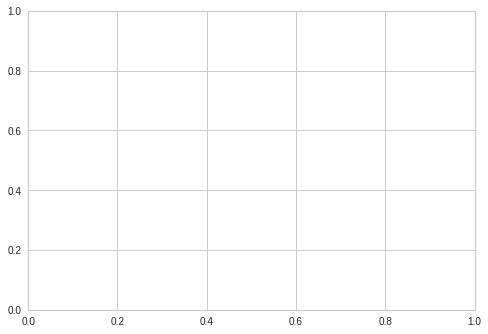

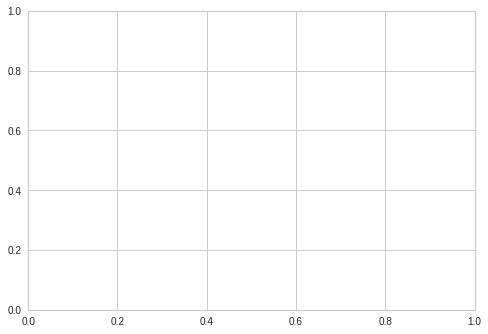

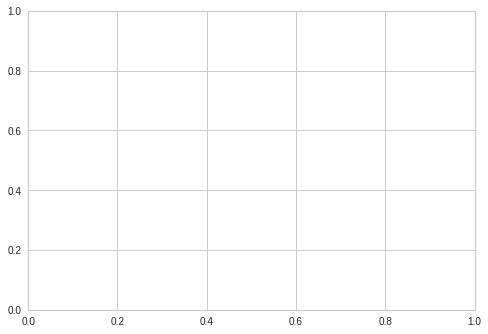

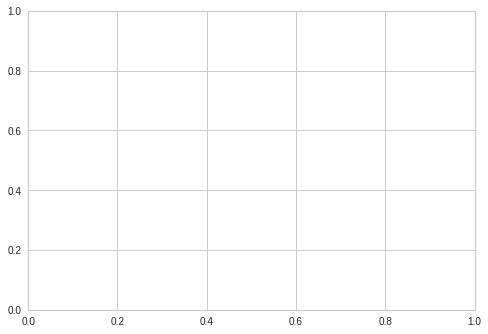

In [64]:
evaluate_model(stars_knn_final)

In [0]:
stars_finalize = finalize_model(stars_clmodel2)

In [66]:
save_model(stars_finalize, 'stars_finalize_saved_04242020')

Transformation Pipeline and Model Succesfully Saved


In [67]:
save_experiment('stars_exp_04242020')

Experiment Succesfully Saved
